## Test KaerebrumTree with SKlearn Decision Tree to benchmark peformance
- check on accuracy and training speed

In [1]:
import sys
import pandas as pd
sys.path.append(r'C:\Users\User\jupyter\KaelanML')

titan = pd.read_csv(r'C:\Users\User\Dropbox\My PC (LAPTOP-M5BSHAM1)\Desktop\Excel DataCentre\Kaggle\Titanic\train.csv')

In [2]:
# Process data to fill up empty cells
X = titan[['Pclass','Age','Sex','SibSp','Parch','Embarked','Fare']]

median_age = X.Age.median()
mode_embarked = X.Embarked.mode()[0]
X = X.fillna({'Age': median_age, 'Embarked':mode_embarked})

y = titan['Survived']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

## 1) SKlearn model ( Data convert to dummies)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
# hot_code categorical data as Sklearn model cannot train on categorical data 
y2 = titan["Survived"]

features = ["Pclass","Age", "Sex", "SibSp", "Parch", "Fare"]
X2 = pd.get_dummies(X[features])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=24)

In [6]:
sk = DecisionTreeClassifier(min_samples_split=10, max_depth=10, min_samples_leaf =5, max_features= None,max_leaf_nodes=None, splitter = 'best')

In [7]:
%time sk.fit(X_train2,y_train2)
predictions = sk.predict(X_test2)
Accuracy = sum(predictions == y_test2)/len(y_test2)  
Accuracy

Wall time: 3.99 ms


0.8435754189944135

In [8]:
X_train2

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
68,3,17.0,4,2,7.9250,1,0
768,3,28.0,1,0,24.1500,0,1
722,2,34.0,0,0,13.0000,0,1
94,3,59.0,0,0,7.2500,0,1
640,3,20.0,0,0,7.8542,0,1
...,...,...,...,...,...,...,...
145,2,19.0,1,1,36.7500,0,1
401,3,26.0,0,0,8.0500,0,1
343,2,25.0,0,0,13.0000,0,1
192,3,19.0,1,0,7.8542,1,0


#### Sklearn Top features: sex seems to be most important feature follow by fare and class  

In [9]:
feat_importance = sk.tree_.compute_feature_importances(normalize=False)
feat_importance

array([0.04120964, 0.03010102, 0.01077499, 0.00464929, 0.06796101,
       0.13960453, 0.        ])

#### SKlearn Tree map

[Text(558.0, 737.9781818181818, 'X[5] <= 0.5\ngini = 0.477\nsamples = 712\nvalue = [432, 280]'),
 Text(250.4852878464819, 667.6945454545455, 'X[0] <= 1.5\ngini = 0.316\nsamples = 458\nvalue = [368, 90]'),
 Text(81.22132196162048, 597.4109090909092, 'X[1] <= 60.5\ngini = 0.469\nsamples = 101\nvalue = [63, 38]'),
 Text(60.91599147121536, 527.1272727272727, 'X[4] <= 26.144\ngini = 0.486\nsamples = 91\nvalue = [53, 38]'),
 Text(40.61066098081024, 456.8436363636364, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(81.22132196162048, 456.8436363636364, 'X[4] <= 27.135\ngini = 0.496\nsamples = 83\nvalue = [45, 38]'),
 Text(40.61066098081024, 386.56, 'X[1] <= 43.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(20.30533049040512, 316.27636363636367, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(60.91599147121536, 316.27636363636367, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(121.83198294243071, 386.56, 'X[4] <= 29.85\ngini = 0.483\nsamples = 71\nvalue = [42, 29]'),
 Text(10

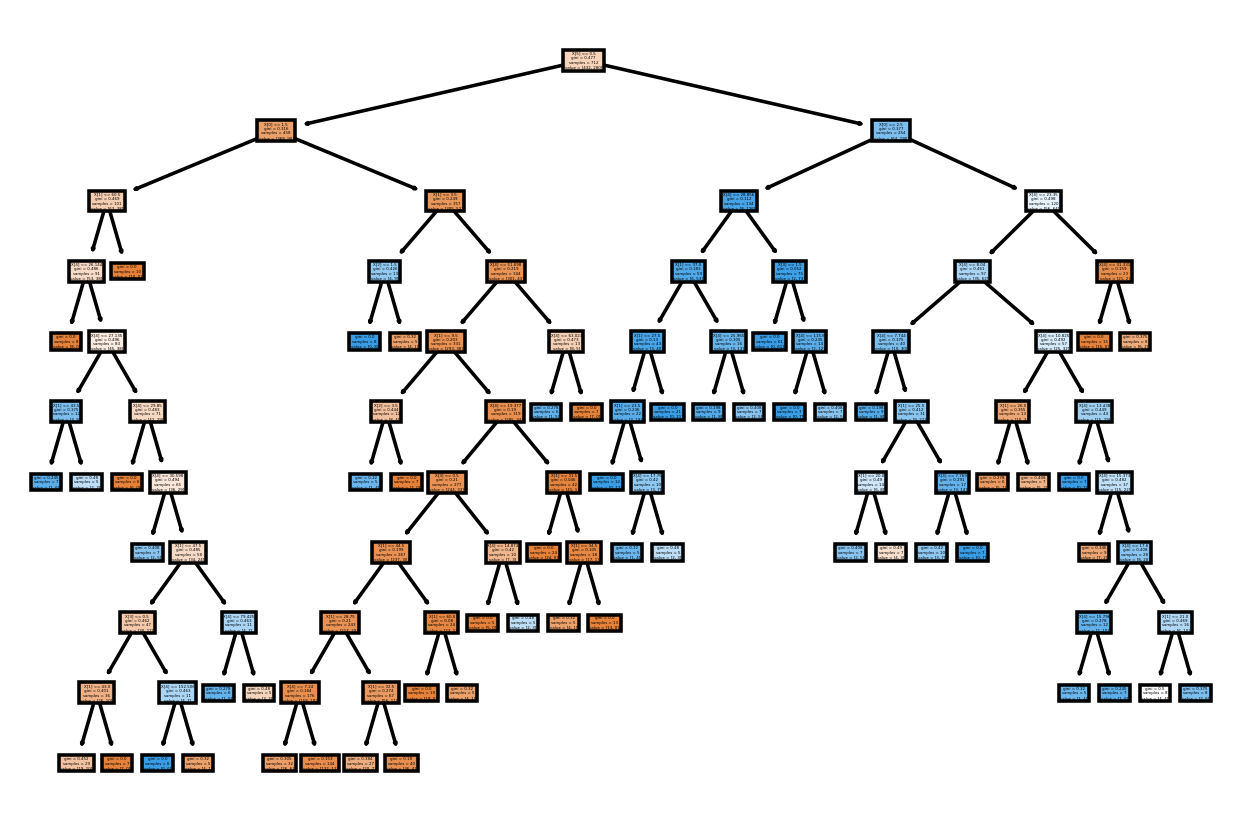

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(dpi=256)
tree.plot_tree(sk,filled=True)

## 2) KaerebrumTree Model

In [11]:
from Kaerebrum.Kaetree import DecisionTreeClassifier

In [12]:
Ktree = DecisionTreeClassifier(min_samples=10, max_depth=10, min_leaf= 5, n_feats= 0,max_leaf_nodes = 0, split='best', measure='gini',cat_thres= 5)
%time Ktree.train(X_train,y_train)

Wall time: 46.9 ms


In [28]:
result = Ktree.predict(X_test)
result

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [29]:
Accuracy = sum(result == y_test)/len(y_test)  
Accuracy

0.8212290502793296

#### top features method

In [15]:
Ktree.top_features()

,Features,Feature Names,Scores
Impt,,,
0,2.0,Sex,0.139605
1,6.0,Fare,0.04434
2,0.0,Pclass,0.04121
3,1.0,Age,0.023551
4,5.0,Embarked,0.003495
5,4.0,Parch,0.00019


#### Karebrum Tree Map . Options for various layout methods 


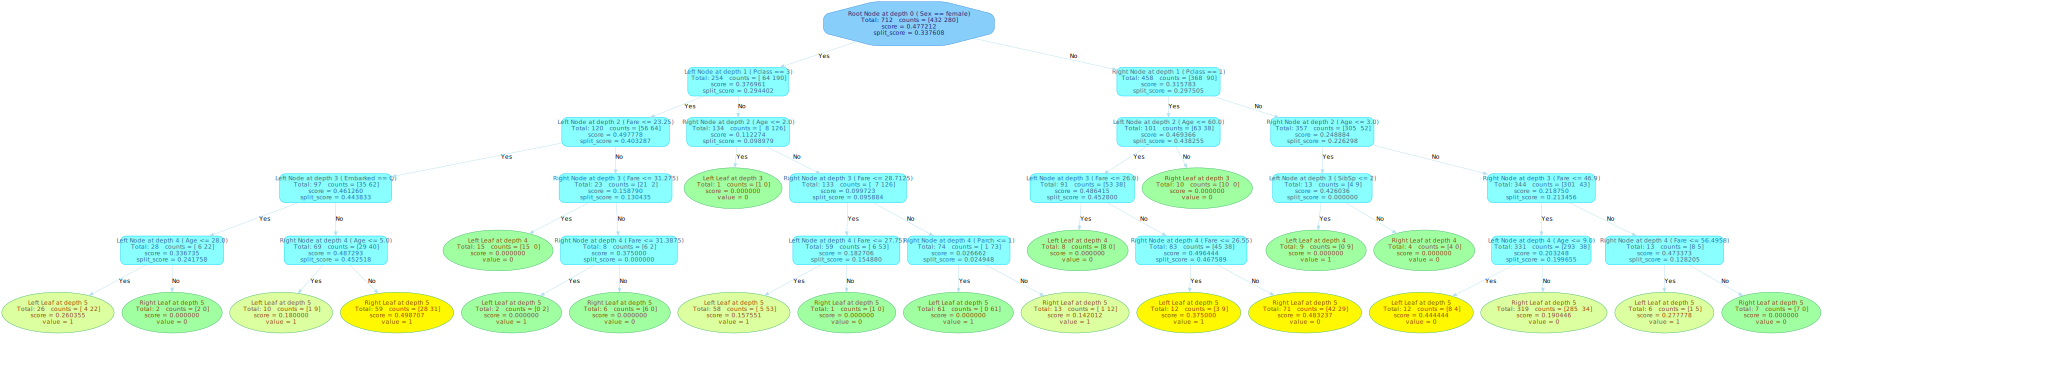

In [11]:
Ktree.tree.view(engine='DOT', res=96, output='png', font='Rubik')

#### Save the model as code 

In [12]:
print(Ktree.tree.code())

for X in df:
    if (X[2] == "female"):
        if (X[0] == 3):
            if (X[6] <= 23.25):
                if (X[5] == "Q"):
                    if (X[1] <= 28.0):
                        return 1
                    else:
                        return 0
                else:
                    if (X[1] <= 5.0):
                        return 1
                    else:
                        return 1
            else:
                if (X[6] <= 31.275):
                    return 0
                else:
                    if (X[6] <= 31.3875):
                        return 1
                    else:
                        return 0
        else:
            if (X[1] <= 2.0):
                return 0
            else:
                if (X[6] <= 28.7125):
                    if (X[6] <= 27.75):
                        return 1
                    else:
                        return 0
                else:
                    if (X[4] <= 1):
                        return 1

#### Put the code into a function 

In [25]:
def pred(X):
    if (X[2] == "female"):
        if (X[0] == 3):
            if (X[6] <= 23.25):
                if (X[5] == "Q"):
                    if (X[1] <= 28.0):
                        return 1
                    else:
                        return 0
                else:
                    if (X[1] <= 5.0):
                        return 1
                    else:
                        return 1
            else:
                if (X[6] <= 31.275):
                    return 0
                else:
                    if (X[6] <= 31.3875):
                        return 1
                    else:
                        return 0
        else:
            if (X[1] <= 2.0):
                return 0
            else:
                if (X[6] <= 28.7125):
                    if (X[6] <= 27.75):
                        return 1
                    else:
                        return 0
                else:
                    if (X[4] <= 1):
                        return 1
                    else:
                        return 1
    else:
        if (X[0] == 1):
            if (X[1] <= 60.0):
                if (X[6] <= 26.0):
                    return 0
                else:
                    if (X[6] <= 26.55):
                        return 1
                    else:
                        return 0
            else:
                return 0
        else:
            if (X[1] <= 3.0):
                if (X[3] <= 2):
                    return 1
                else:
                    return 0
            else:
                if (X[6] <= 46.9):
                    if (X[1] <= 9.0):
                        return 0
                    else:
                        return 0
                else:
                    if (X[6] <= 56.4958):
                        return 1
                    else:
                        return 0
                    
                    

#### Apply the function to the dataframe and get the predictions

In [32]:
r = X_test.apply(pred, 1)

In [33]:
accuracy = sum(r == y_test)/y_test.shape[0]
accuracy

0.8156424581005587

In [41]:
Ktree._feature_trace

array([[1.00000000e+00, 7.58426966e-02, 4.99314129e-01, 2.54443971e-02,
        1.92977169e-03],
       [6.00000000e+00, 8.28651685e-02, 4.98707268e-01, 4.17078958e-02,
        3.45613181e-03],
       [1.00000000e+00, 9.69101124e-02, 4.87292586e-01, 3.47747767e-02,
        3.37002752e-03],
       [5.00000000e+00, 1.36235955e-01, 4.61260495e-01, 1.74279197e-02,
        2.37430928e-03],
       [6.00000000e+00, 3.23033708e-02, 1.58790170e-01, 2.83553875e-02,
        9.15974597e-04],
       [6.00000000e+00, 1.68539326e-01, 4.97777778e-01, 9.44907615e-02,
        1.59254092e-02],
       [0.00000000e+00, 3.56741573e-01, 3.76960754e-01, 8.25587482e-02,
        2.94521377e-02],
       [6.00000000e+00, 1.16573034e-01, 4.96443606e-01, 2.88549412e-02,
        3.36370804e-03],
       [6.00000000e+00, 1.27808989e-01, 4.86414684e-01, 3.36144724e-02,
        4.29623172e-03],
       [1.00000000e+00, 1.41853933e-01, 4.69365748e-01, 3.11109340e-02,
        4.41320833e-03],
       [6.00000000e+00, 3.3707